In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ppt = pd.read_csv(r"E:\Python basics\Pranjal Sir\Pandas Data Sets\Property_Price_Train.csv")

In [3]:
ppt.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
ppt.isnull().sum()[ppt.isnull().sum() > 0]

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type           8
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [5]:
# lets remove thr those cols which have high percentage of nulls.

In [6]:
ppt.isnull().sum()[ppt.isnull().sum()*100 / ppt.shape[0] > 40]

Lane_Type                1368
Fireplace_Quality         689
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [7]:
ppt = ppt.drop(['Lane_Type','Fireplace_Quality','Pool_Quality','Fence_Quality','Miscellaneous_Feature','Id'], axis =1)

In [8]:
ppt.columns[ppt.dtypes == 'object']

Index(['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality',
       'Functional_Rate', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
ppt.Zoning_Class = le.fit_transform(ppt.Zoning_Class)

In [11]:
ppt[ppt.select_dtypes(include = 'object').columns] = ppt[ppt.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [12]:
ppt.Lot_Extent.fillna(int(ppt.Lot_Extent.mean()), inplace = True)
ppt.Brick_Veneer_Type.fillna(ppt.Brick_Veneer_Type.max(), inplace = True)
ppt.Brick_Veneer_Area.fillna(int(ppt.Brick_Veneer_Area.mean()),inplace = True)
ppt.Basement_Height.fillna(ppt.Basement_Height.max(),inplace = True)
ppt.Basement_Condition.fillna(ppt.Basement_Condition.max(), inplace = True)
ppt.Exposure_Level.fillna(ppt.Exposure_Level.max(),inplace = True)
ppt.BsmtFinType1.fillna(ppt.BsmtFinType1.max(), inplace = True)
ppt.BsmtFinType2.fillna(ppt.BsmtFinType2.max(), inplace = True)
ppt.Electrical_System.fillna(ppt.Electrical_System.max(), inplace = True)
ppt.Garage.fillna(ppt.Garage.max(), inplace = True)
ppt.Garage_Built_Year.fillna(int(ppt.Garage_Built_Year.mean()), inplace = True)
ppt.Garage_Finish_Year.fillna(ppt.Garage_Finish_Year.max(), inplace = True)
ppt.Garage_Quality.fillna(ppt.Garage_Quality.max(), inplace = True)
ppt.Garage_Condition.fillna(ppt.Garage_Condition.max(), inplace = True)


#### Distributions of numeric features

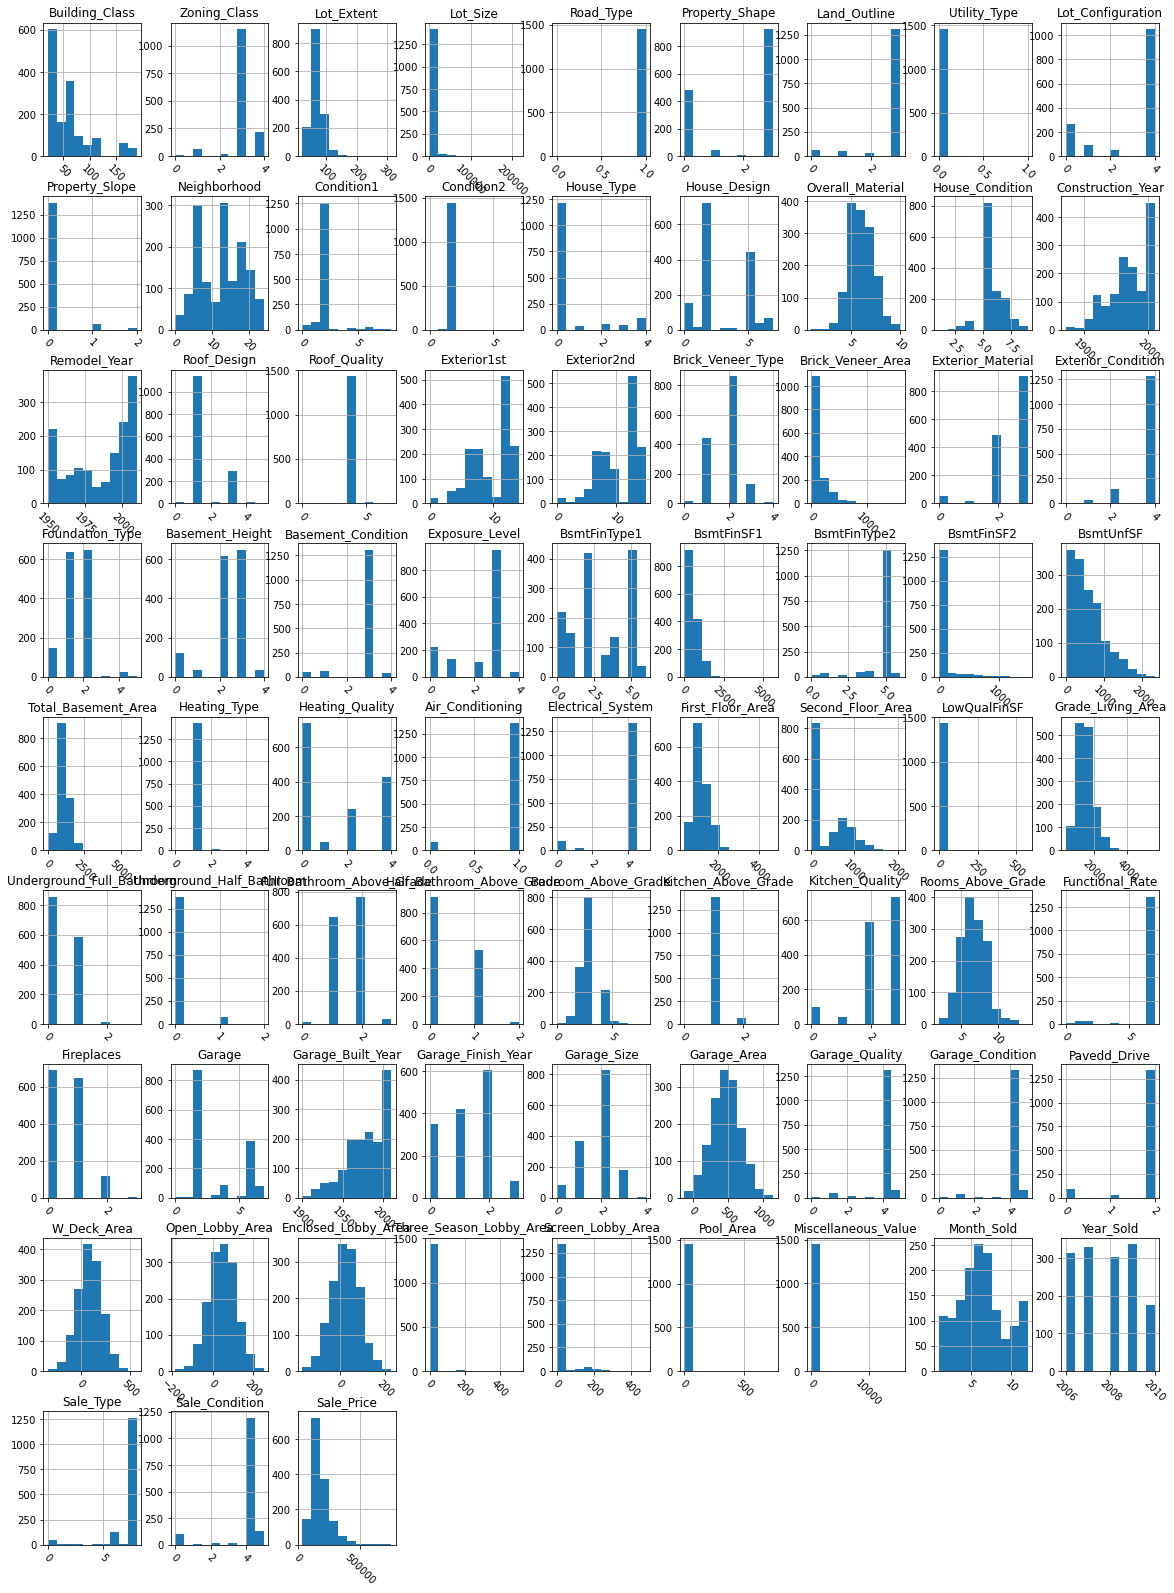

In [18]:
# Plot histogram grid
ppt.hist(figsize=(20,28), xrot=-45)

# Clear the text "residue"
plt.show()

### Random Sampling

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
ppt_train, ppt_test = train_test_split(ppt, test_size= .2)

In [23]:
ppt_train_x = ppt_train.iloc[: , 0:-1]
ppt_train_y = ppt_train.iloc[: , -1]

ppt_test_x = ppt_test.iloc[: , 0:-1]
ppt_test_y = ppt_test.iloc[: , -1]

In [24]:
print(ppt_train_x.shape, ppt_train_y.shape)

(1167, 74) (1167,)


In [25]:
print(ppt_test_x.shape, ppt_test_y.shape)

(292, 74) (292,)


### Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [161]:
linreg.fit(ppt_train_x, ppt_train_y)

LinearRegression()

In [162]:
pred = linreg.predict(ppt_test_x)

In [163]:
Rsquare = linreg.score(ppt_train_x, ppt_train_y)
Rsquare

0.8520997636154911

In [164]:
# 84% of the model is explaining the total variance. 

In [165]:
N = ppt_train_x.shape[0]
K = ppt_train_x.shape[1]

AdjRsquare = 1-(1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.8420772201242332

In [166]:
# Assumptions :-

In [167]:
pred_train = linreg.predict(ppt_train_x)

In [168]:
err_train = ppt_train_y - pred_train
err_train

642     17840.907500
267      -650.675399
284      -208.025510
738     49205.013146
710     -4591.740372
            ...     
947    -11988.688943
356     -5551.663538
322     17430.736298
828    -27701.676103
1259   -17610.347594
Name: Sale_Price, Length: 1167, dtype: float64

In [169]:
import numpy as np

In [170]:
np.mean(err_train)

-2.0948772565258193e-11

In [171]:
import matplotlib.pyplot as plt

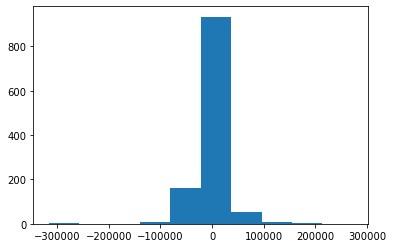

In [172]:
plt.hist(err_train);

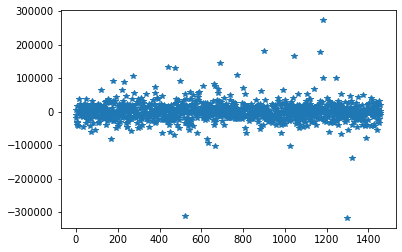

In [173]:
plt.plot(err_train,'*');

In [174]:
pred_actual = pd.DataFrame()

In [175]:
pred_actual['actual'] = ppt_train_y
pred_actual['predicted'] = pred_train

In [176]:
import seaborn as sns

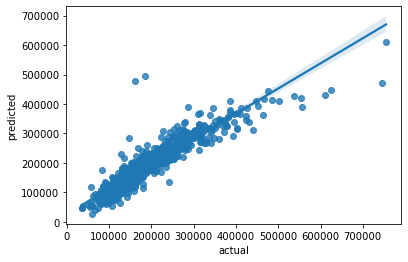

In [177]:
sns.regplot(x='actual', y='predicted', data = pred_actual);

In [178]:
pred_test = linreg.predict(ppt_test_x)
err_test = ppt_test_y - pred_test

In [179]:
MSE = np.mean(np.square(err_test))
MSE

939923713.0193383

In [180]:
RMSE = np.sqrt(MSE)
RMSE

30658.175304791675

In [181]:
MAPE = np.mean(np.abs(err_test*100/ppt_test_y))

In [182]:
MAPE

11.95987247756153

#### Removing Outliers

In [26]:
def remove_outliers(df,  col, k  ):   
    mean = df[col].mean()
    global df1
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]         
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
    print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])


In [27]:
remove_outliers(ppt, 'Sale_Price',2)

(1396, 75)
Number of outliers removed == > 63


#### Co-relation (independent and target variable)

In [49]:
# if a corelation b/w a x cloumn and your y column is close to zero then there is no point using that col for model bilding ???

In [50]:
x_col = ppt_train_x.columns

In [51]:
cor_list = []
for col in x_col:
    cor_list.append(ppt.Sale_Price.corr(ppt[col]))

In [52]:
cols_corr    = pd.DataFrame()
cols_corr['Columns'] = x_col
cols_corr['Corelation'] = cor_list

In [53]:
cols_corr

,Columns,Corelation
0,Building_Class,-0.084563
1,Zoning_Class,-0.166896
2,Lot_Extent,0.334988
3,Lot_Size,0.263843
4,Road_Type,0.041057
...,...,...
69,Miscellaneous_Value,-0.021216
70,Month_Sold,0.046401
71,Year_Sold,-0.028884
72,Sale_Type,-0.054826


In [54]:
df = cols_corr[(cols_corr.Corelation < -.3) | (cols_corr.Corelation > .3)]

In [55]:
l1 = list(df.Columns)
l1.append('Sale_Price')

In [56]:
ppt1 = ppt.loc[:,l1]

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dt = DecisionTreeRegressor()

In [39]:
dt.fit(ppt_train_x, ppt_train_y)

DecisionTreeRegressor()

In [40]:
pred = dt.predict(ppt_test_x)
err_test = ppt_test_y - pred

In [41]:
Rsquare = dt.score(ppt_train_x, ppt_train_y)
Rsquare

1.0

In [42]:
from sklearn.metrics import r2_score

r2 = r2_score(ppt_test_y, pred)
r2

0.5733958803056818

In [43]:
MSE = np.mean(np.square(err_test))
MSE

2613701713.537671

In [44]:
RMSE = np.sqrt(MSE)
RMSE

51124.37494520271

In [45]:
MAPE = np.mean(np.abs(err_test*100/ppt_test_y))
MAPE

15.821298758838223

### Feature Importance

In [46]:
dt.feature_importances_
feature_importance = pd.DataFrame()
feature_importance['columns'] = ppt_train_x.columns
feature_importance['Score'] = dt.feature_importances_
feature_importance.sort_values('Score', ascending=False)

,columns,Score
15,Overall_Material,5.831570e-01
44,Grade_Living_Area,9.578696e-02
41,First_Floor_Area,6.864068e-02
47,Full_Bathroom_Above_Grade,4.906203e-02
36,Total_Basement_Area,4.784742e-02
...,...,...
67,Screen_Lobby_Area,4.213013e-07
62,Pavedd_Drive,2.696328e-07
12,Condition2,0.000000e+00
7,Utility_Type,0.000000e+00


### Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf = RandomForestRegressor(n_estimators=150, max_depth=5)

In [30]:
rf.fit( ppt_train_x, ppt_train_y)

RandomForestRegressor(max_depth=5, n_estimators=150)

In [31]:
pred = rf.predict(ppt_test_x)
err_test = ppt_test_y - pred

In [32]:
Rsquare = rf.score(ppt_train_x, ppt_train_y)
MSE = np.mean(np.square(err_test))
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs(err_test*100/ppt_test_y))

print(Rsquare)
print(MSE)
print(RMSE)
print(MAPE)

0.9217214199531661
1430927200.3085787
37827.598394671826
12.264486167223186


### Feature Importance

In [33]:
rf.feature_importances_
feature_importance = pd.DataFrame()
feature_importance['columns'] = ppt_train_x.columns
feature_importance['Score'] = rf.feature_importances_
feature_importance.sort_values('Score', ascending=False)

,columns,Score
15,Overall_Material,6.165240e-01
44,Grade_Living_Area,1.118409e-01
36,Total_Basement_Area,4.705514e-02
41,First_Floor_Area,4.383544e-02
58,Garage_Size,3.127378e-02
...,...,...
66,Three_Season_Lobby_Area,3.135987e-10
4,Road_Type,0.000000e+00
7,Utility_Type,0.000000e+00
69,Miscellaneous_Value,0.000000e+00


#### hyper parameter turning

In [272]:
search_dict = {"max_depth": range(1,10)}

In [273]:
from sklearn.model_selection import GridSearchCV

In [274]:
grid = GridSearchCV(dt, param_grid = search_dict)

In [275]:
grid.fit(ppt_train_x , ppt_train_y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10)})

In [276]:
grid.predict(ppt_test_x)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 6}
0.7499287743870469


#### Ridge and Lasso

In [278]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(ppt_train_x , ppt_train_y)
rid.score(ppt_train_x , ppt_train_y)

0.8458990067114835

In [281]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(ppt_train_x , ppt_train_y)
las.score(ppt_train_x, ppt_train_y)

0.8460170397780019

####  Boosting on decision tree

In [282]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(dt, n_estimators= 50)

In [284]:
ab.fit(ppt_train_x, ppt_train_y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

In [285]:
pred_boost = ab.predict(ppt_test_x)

In [286]:
ab.score(ppt_train_x, ppt_train_y)

0.9997615184306179

####  Boosting on random forest

In [298]:
ab_rf = AdaBoostRegressor(rf)
ab_rf.fit(ppt_train_x,ppt_train_y)
pred_ab_rf = ab_rf.predict(ppt_test_x)
ab_rf.score(ppt_train_x, ppt_train_y)

0.9549039015147616

#### KNN

In [297]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=26)
knn.fit(ppt_train_x, ppt_train_y)
pred = knn.predict(ppt_test_x)
knn.score(ppt_train_x, ppt_train_y)

0.6098062503378587

## Final Outcome
Comparing all the models from the above, R-squared, MSE, RMSE, MAPE for Decision Tree Regressor is better(i.e MSE and MAPE is least and R-squared is more) than other models so Decision Tree is the winning Model...